# Домашнее задание

Задание 1 [5 баллов]. Дана функция $f(x) = C * exp(cos(x))*sin(x)$ на интервале $I\{x \in [0, \pi] = [a, b]\}$.
При этом $f(x) = 0$ вне указанного интервала

1. Определите значение константы C, при которой данная функция является плотностью распределения.
2. Изобразите графически функцию плотности.
3. Рассчитайте формулу для функции распределения и изобразите её графически.
4. Рассчитайте значение математического ожидания (подсказка - может помочь scipy.integrate)
5. Проверьте центральную предельную теорему для данного распределения.

In [102]:
from random import uniform
import numpy as np
import scipy.stats as sps
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

1. Интегрирование функции $C * exp(cos(x))*sin(x)$ дает $-C \cdot exp(cos(x))$.\
Интеграл по отрезку даст: $-C\cdot exp(-1) - (-C\cdot exp(1)) = C \cdot (e - \frac{1}{e})$\
Необходимо, чтобы площадь равнялась 1, значит $$C = \frac{1}{e - \frac{1}{e}} = \frac{e}{e^2 - 1}$$

In [5]:
# 1
C = np.exp(1) / (np.exp(2) - 1)
C

0.4254590641196607

In [12]:
# 2
class custom_gen(sps.rv_continuous):
    def _pdf(self, x):
        return np.exp(1) / (np.exp(2) - 1) * np.exp(np.cos(x)) * np.sin(x)

custom = custom_gen(a=0, b=np.pi, name='custom')

sample = custom.rvs(size=200)

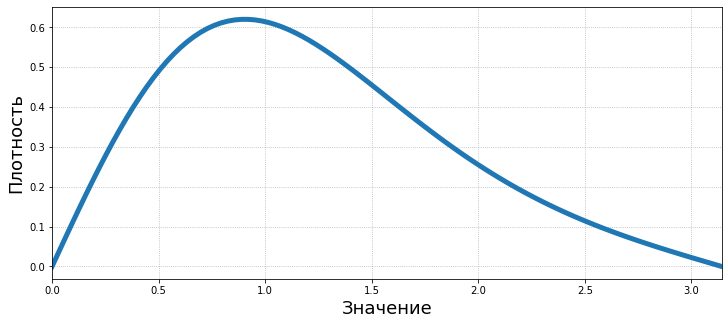

In [15]:
xmin = 0
xmax = np.pi
grid_size = 100

grid = np.linspace(xmin, xmax, grid_size)  
plt.figure(figsize=(12, 5))
plt.plot(grid, custom.pdf(grid), lw=5)
plt.grid(ls=':')
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.xlim((xmin, xmax))

plt.show()

3. Интегрирование функции $C * exp(cos(x))*sin(x)$ дает $-C \cdot exp(cos(x))$.\
Надо посмотреть на два предела интегрирования: x и $0$\
Получим $$C * (e - e^{cos(x)})$$

In [19]:
class custom_gen(sps.rv_continuous):
    def _pdf(self, x):
        C = np.exp(1) / (np.exp(2) - 1)
        return C * np.exp(np.cos(x)) * np.sin(x)
    
    def _cdf(self, x):
        C = np.exp(1) / (np.exp(2) - 1)
        return C * (np.exp(1) - np.exp(np.cos(x)))

In [20]:
custom = custom_gen(a=0, b=np.pi, name='custom')

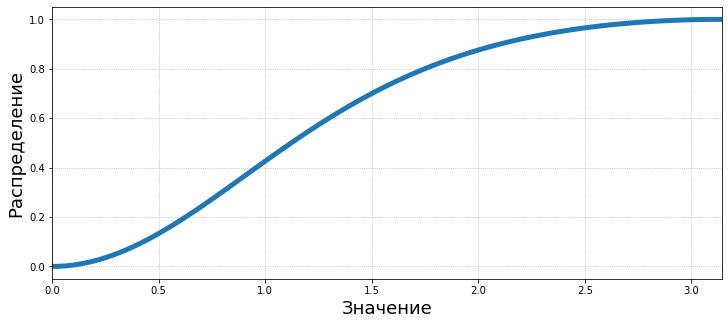

In [21]:
xmin = 0
xmax = np.pi
grid_size = 100

grid = np.linspace(xmin, xmax, grid_size)  
plt.figure(figsize=(12, 5))
plt.plot(grid, custom.cdf(grid), lw=5)
plt.grid(ls=':')
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Распределение', fontsize=18)
plt.xlim((xmin, xmax))

plt.show()

4. Среднее ищем как интеграл от $x * f(x)$ на интервале $[0,\pi]$

In [38]:
#4

custom_mean, _ = integrate.quad(lambda x : x * custom.pdf(x), 0, np.pi)
custom_mean

1.2005331197658555


5. Проверка ЦПТ

In [41]:
custom_variance, _ = integrate.quad(lambda x : (x - custom_mean) ** 2 * custom.pdf(x), 0, np.pi)
custom_sigma = np.sqrt(custom_variance)
custom_variance, custom_sigma

(0.39826889561495815, 0.6310854899417021)

In [123]:
n_samples = 500
size = 1000
sub_sample_size = 900
mean_arr = []

# Генерируем выборку
sample = custom.rvs(size=size)  

for i in range(n_samples):
    # берем подвыборку
    sub_sample = sample[np.random.choice(sample, size = sub_sample_size).astype(int)]
    # приводим к нормальному виду
    normalized = np.sqrt(sub_sample_size) * (np.mean(sub_sample) - custom_mean) / custom_sigma
    mean_arr.append(normalized)

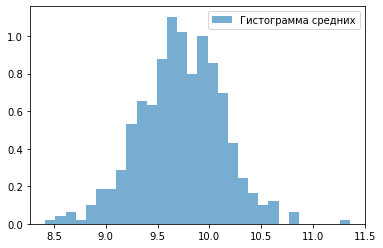

In [124]:
grid = np.linspace(-3, 3, 1000)

plt.hist(mean_arr, bins=30, density=True, 
         alpha=0.6, label='Гистограмма средних') 

#plt.plot(grid, sps.norm.pdf(grid), color='red', label='Нормальное распределение') 

plt.legend()
plt.show()

Распределение средних стремится к форме номарльного, но почему-то смещено

Задание 2 [5 баллов]. Сгенерируйте 3 выборки из 3 различных распределений размерностью 1000, 50 000, 750 000

1. Рассчитайте основные статистические показатели для каждой из выборок и сравните их с теоретическими показателями выбранных вами распределений. Должны быть посчитаны:
- среднее
- дисперсия
2. Проверьте критерий Колмогорова для 3 выборок.
3. Для каждой пары выборок (всего будет 3) проверьте критерий Манна-Уитни.

In [140]:
size_arr = [1000, 50000, 750000]

In [141]:
true_mean_norm = 0
true_var_norm = 1

norm_samples = []

for size in size_arr:
    sample = sps.norm.rvs(size=size)
    norm_samples.append(sample)
    print(f"Sample N = {size} mean: {np.mean(sample)} | true {true_mean_norm}")
    print(f"Sample N = {size} var: {np.var(sample)} | true {true_var_norm}")

Sample N = 1000 mean: -0.04096336713102298 | true 0
Sample N = 1000 var: 1.030747454562558 | true 1
Sample N = 50000 mean: 0.0026156352460601625 | true 0
Sample N = 50000 var: 0.9888859007660274 | true 1
Sample N = 750000 mean: -0.00267026435704359 | true 0
Sample N = 750000 var: 1.0028672208429408 | true 1


In [142]:
# Параметр распределения
a = 1
true_mean_maxwell = 2 * a * np.sqrt(2 / np.pi)
true_var_maxwell = a ** 2 * (3 * np.pi - 8) / np.pi

maxwell_samples = []

for size in size_arr:
    sample = sps.maxwell.rvs(size=size, scale=a)
    maxwell_samples.append(sample)
    print(f"Sample N = {size} mean: {np.mean(sample)} | true {true_mean_maxwell}")
    print(f"Sample N = {size} var: {np.var(sample)} | true {true_var_maxwell}")

Sample N = 1000 mean: 1.6415713339795406 | true 1.5957691216057308
Sample N = 1000 var: 0.4986280825157569 | true 0.4535209105296745
Sample N = 50000 mean: 1.5894082547159918 | true 1.5957691216057308
Sample N = 50000 var: 0.45109700653564555 | true 0.4535209105296745
Sample N = 750000 mean: 1.5968540912182048 | true 1.5957691216057308
Sample N = 750000 var: 0.45324490415574076 | true 0.4535209105296745


In [143]:
l = 0.5

true_mean_exp = 1 / l
true_var_exp = 1 / l ** 2

expon_samples = []

for size in size_arr:
    sample = sps.expon.rvs(size=size, scale=1 / l)
    expon_samples.append(sample)
    print(f"Sample N = {size} mean: {np.mean(sample)} | true {true_mean_exp}")
    print(f"Sample N = {size} var: {np.var(sample)} | true {true_var_exp}")

Sample N = 1000 mean: 1.995525051211134 | true 2.0
Sample N = 1000 var: 4.260978883191554 | true 4.0
Sample N = 50000 mean: 2.0080761804866305 | true 2.0
Sample N = 50000 var: 3.97243997903006 | true 4.0
Sample N = 750000 mean: 1.997274410955255 | true 2.0
Sample N = 750000 var: 3.9953832341190503 | true 4.0


2. Тест Колмогорова

In [144]:
for sample in norm_samples:
    print(sps.kstest(sample, sps.norm.cdf))

KstestResult(statistic=0.03647178140508628, pvalue=0.13641322032155068)
KstestResult(statistic=0.003133373970210629, pvalue=0.7089243036911947)
KstestResult(statistic=0.0016025176707658573, pvalue=0.04242463400714869)


In [145]:
for sample in maxwell_samples:
    print(sps.kstest(sample, sps.maxwell.cdf))

KstestResult(statistic=0.04136981966274478, pvalue=0.06342220362823392)
KstestResult(statistic=0.004078959218468237, pvalue=0.3752647065813167)
KstestResult(statistic=0.0011964987823127604, pvalue=0.23301445734386705)


In [146]:
for sample in expon_samples:
    print(sps.kstest(sample, sps.expon.cdf))

KstestResult(statistic=0.24901723743548188, pvalue=4.085424095875569e-55)
KstestResult(statistic=0.25503006294228875, pvalue=0.0)
KstestResult(statistic=0.24945304352920744, pvalue=0.0)


3. Критерий Мана-Уитни

In [147]:
for i in range(3):
    print(sps.mannwhitneyu(norm_samples[i], maxwell_samples[i]))

MannwhitneyuResult(statistic=86626.0, pvalue=7.478365637758581e-225)
MannwhitneyuResult(statistic=227638798.0, pvalue=0.0)
MannwhitneyuResult(statistic=50926885244.0, pvalue=0.0)


In [138]:
for i in range(3):
    print(sps.mannwhitneyu(norm_samples[i], expon_samples[i]))

MannwhitneyuResult(statistic=145351.0, pvalue=4.716310200250888e-166)
MannwhitneyuResult(statistic=377680016.0, pvalue=0.0)
MannwhitneyuResult(statistic=84876445122.0, pvalue=0.0)


In [139]:
for i in range(3):
    print(sps.mannwhitneyu(maxwell_samples[i], expon_samples[i]))

MannwhitneyuResult(statistic=535029.0, pvalue=0.006675403536928448)
MannwhitneyuResult(statistic=1313025275.0, pvalue=2.2783330254947624e-43)
MannwhitneyuResult(statistic=295583710903.0, pvalue=0.0)
